<a href="https://colab.research.google.com/github/LohitSubodh/Landmine-detection-using-CNN/blob/main/CNN_LandmineDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [ ]:
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Cpaston_Project/2020_08_21/gprMax/

/content/drive/.shortcut-targets-by-id/1xAAKRBNZ9m-dmyYDubl-gdVqQHhJ6OWL/Cpaston_Project/2020_08_21/gprMax


In [ ]:
! pip install colorama

In [ ]:
! pip install terminaltables

  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15357 sha256=2e0feb3109a62b79b77fe2b69e12c2d87e6682f8a099c8e95a0bf2d9188017e3
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables


In [ ]:
import os
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1xAAKRBNZ9m-dmyYDubl-gdVqQHhJ6OWL/Cpaston_Project/2020_08_21/gprMax'

In [ ]:
arrays=[]

In [ ]:
%matplotlib inline
from tools.plot_Bscan import get_output_data, mpl_plot
path='/content/drive/My Drive/Cpaston_Project/2020_08_21/gprMax/project'
#/content/drive/My Drive/Cpaston_Project/2020_08_21/gprMax/project/Output_files/no_mine1_merged.out
#filename='project/Output_files/no_mine1_merged.out'
for i in range(1,41):
  filename = os.path.join( path,'Output_files','mine','mine'+str(i)+'_merged.out')
  rxnumber = 1
  rxcomponent = 'Ey'
  outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
  outputdata=outputdata.reshape(1300,60)
  arrays.append(outputdata)
   
#print(outputdata.shape)
#plt = mpl_plot(filename,outputdata, dt, rxnumber, rxcomponent)
#print(outputdata.shape)

# Change from the default 'seismic' colormap
#plt.set_cmap('gray')

In [ ]:
for i in range(1,161):
  filename = os.path.join( path,'Output_files','without_mine','nomine'+str(i)+'_merged.out')
  rxnumber = 1
  rxcomponent = 'Ey'
  outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
  #print(i,sep=" ")
  outputdata=outputdata.reshape(1300,60)
  arrays.append(outputdata)
#print(outputdata.shape)
#plt = mpl_plot(filename,outputdata, dt, rxnumber, rxcomponent)  

In [ ]:
X=np.stack(arrays)


In [ ]:
X.shape

(200, 1300, 60)

In [ ]:
X[3].shape

(1300, 60)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X=X.reshape(200,1300,60,1)

In [ ]:
y=[1]*40

In [ ]:
len(y)

40

In [ ]:
no_mine=[0]*160

In [ ]:
y.extend(no_mine)

In [ ]:
len(y)

200

In [ ]:
y.extend(y)
print(len(y))

400


In [ ]:
X = X/255

In [ ]:
#adding noise
def Noise(X, sigma=0.0005):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise

X_aug = []
for i in range(len(X)):
  X_aug.append(Noise(X[i]))
 

In [ ]:
X_aug = np.stack(X_aug)
X_aug=X_aug.reshape(200,1300,60,1)

In [ ]:
X_aug[0].shape

(1300, 60, 1)

In [ ]:
X = np.concatenate((X,X_aug))
print(X.shape)

(400, 1300, 60, 1)


In [ ]:
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33,stratify=y, random_state=0)

In [ ]:
X_train.shape

(268, 1300, 60, 1)

In [ ]:
y_test

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train,num_classes = 2)
y_test = to_categorical(y_test,num_classes = 2)
y_test[-1]

array([1., 0.], dtype=float32)

In [ ]:
y_test[0]

array([1., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Dropout,MaxPool2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()
model.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same', 
                 input_shape = (1300,60,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 50, kernel_size = (5,5),padding = 'Same'
                 ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 500, kernel_size = (4,4),padding = 'Same', activation ='relu'))
model.add(Dropout(0.5))
#model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 26, kernel_size = (2,1),padding = 'Same'))
model.add(Flatten())
#model.add(Conv2D(10, activation = "relu"))
model.add(Dense(2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1300, 60, 20)      520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 650, 30, 20)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 650, 30, 50)       25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 325, 15, 50)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 325, 15, 500)      400500    
_________________________________________________________________
dropout (Dropout)            (None, 325, 15, 500)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 325, 15, 26)       2

In [ ]:
#compile model using accuracy to measure model performance
# use this optimizer
from keras.optimizers import SGD
opt = SGD(lr=1e-4,momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
X_train.shape

(253, 1300, 60, 1)

In [ ]:
from sklearn.utils import compute_class_weight

y_ints = [y.argmax() for y in y_train]
classWeight = compute_class_weight('balanced',np.unique(np.array(y_ints)),y_ints) 
classWeight = dict(enumerate(classWeight))

In [ ]:
# didnt run this
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=50

In [ ]:
X_train = X_train.astype("float32")
X_test=X_test.astype("float32")

In [ ]:
#dont run this
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = 10, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              ,callbacks=[learning_rate_reduction],class_weight=classWeight)

In [ ]:
#train the model
history=model.fit(X_train, y_train, batch_size =100,validation_data=(X_test, y_test), epochs=10,verbose = 1,class_weight=classWeight)

Epoch 1/10
3/3 [==============================] - 86s 29s/step - loss: 0.7170 - accuracy: 0.5448 - val_loss: 0.6422 - val_accuracy: 0.8030
Epoch 2/10
3/3 [==============================] - 84s 28s/step - loss: 0.6862 - accuracy: 0.6604 - val_loss: 0.5833 - val_accuracy: 0.8030
Epoch 3/10
3/3 [==============================] - 83s 28s/step - loss: 0.6355 - accuracy: 0.8209 - val_loss: 0.5314 - val_accuracy: 0.8636
Epoch 4/10
3/3 [==============================] - 84s 28s/step - loss: 0.5955 - accuracy: 0.8619 - val_loss: 0.4721 - val_accuracy: 0.9015
Epoch 5/10
3/3 [==============================] - 83s 28s/step - loss: 0.5610 - accuracy: 0.8769 - val_loss: 0.4406 - val_accuracy: 0.9545
Epoch 6/10
3/3 [==============================] - 84s 28s/step - loss: 0.4976 - accuracy: 0.9328 - val_loss: 0.4268 - val_accuracy: 0.9621
Epoch 7/10
3/3 [==============================] - 83s 28s/step - loss: 0.4323 - accuracy: 0.9179 - val_loss: 0.3982 - val_accuracy: 0.9697
Epoch 8/10
3/3 [===========

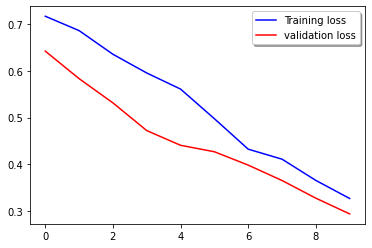

In [ ]:
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss",)
plt.legend(loc='best', shadow=True)

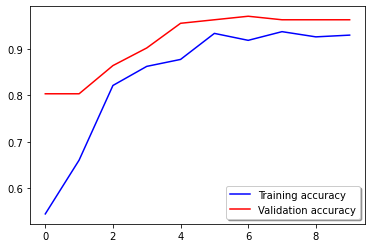

In [ ]:
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [ ]:
Y_true = np.argmax(y_test,axis = 1) 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

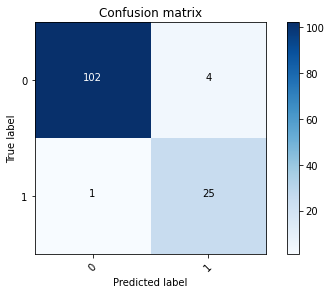

In [ ]:
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [ ]:
#predict first 4 images in the test set
model.predict(X_test[:5])

array([[0.5420346 , 0.45796537],
       [0.8356671 , 0.16433291],
       [0.65116185, 0.3488382 ],
       [0.8359643 , 0.16403566],
       [0.42015907, 0.57984096]], dtype=float32)

In [ ]:
#actual results for first 4 images in test set
y_test[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
model.evaluate(X_test,y_test)


5/5 [==============================] - 11s 2s/step - loss: 0.2937 - accuracy: 0.9621


[0.2937091886997223, 0.9621211886405945]

In [ ]:
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
model.save('my_model.h5')